In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
processed_data2 = pd.read_csv('processed_data2.csv')

In [2]:
processed_data2_1=processed_data2.drop(['Unnamed: 0'],axis=1)
processed_data2_1

,PATIENT_ID,AGE,GENDER,MARITAL_STATUS,ETHNICITY,Blood_Calcium,Blood_Creatinine,Blood_Glucose,Blood_pH,Blood_Urea_Nitrogen,Urine,diabetes,hypertension,Death_Flag
0,0,49,2,5,4,0.131579,0.613636,0.807692,0.379310,0.954545,0.031746,0,1,1
1,1,23,2,5,2,0.625000,0.000000,0.495652,0.190476,0.029412,0.065217,0,0,1
2,2,76,2,3,4,0.222222,0.965517,0.833333,0.200000,0.965517,0.090909,1,1,1
3,3,69,2,3,4,0.500000,0.666667,0.333333,0.875000,0.666667,0.111111,0,1,1
4,4,58,2,6,4,0.857143,0.666667,0.888889,0.294118,0.888889,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,5919,72,1,3,4,0.357143,0.705882,0.882353,0.294118,0.764706,0.069307,0,0,0
5920,5920,78,1,3,4,0.142857,0.875000,0.875000,0.294118,0.625000,0.000000,0,0,0
5921,5921,74,2,3,1,0.500000,0.117647,0.823529,0.333333,0.470588,0.260870,0,0,0
5922,5922,60,1,5,2,0.428571,0.142857,0.285714,0.294118,0.428571,0.052632,0,0,0


In [3]:
processed_data2_1.isnull().sum()

PATIENT_ID             0
AGE                    0
GENDER                 0
MARITAL_STATUS         0
ETHNICITY              0
Blood_Calcium          0
Blood_Creatinine       0
Blood_Glucose          0
Blood_pH               0
Blood_Urea_Nitrogen    0
Urine                  0
diabetes               0
hypertension           0
Death_Flag             0
dtype: int64

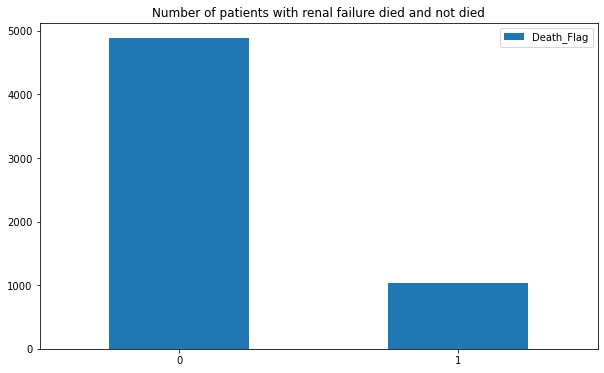

		Mortality of Renal Failure is 17.52 %


In [4]:
plt.figure(figsize = (10,6), facecolor='white')
processed_data2_1.Death_Flag.value_counts().plot.bar() 
plt.tick_params(labelsize=10)
plt.legend(loc="upper right",fontsize=10) 
plt.title("Number of patients with renal failure died and not died")
plt.xticks(rotation=0) 
plt.show()
print('\t\tMortality of Renal Failure is %.2f %%' % (processed_data2_1.Death_Flag.value_counts()[1] / processed_data2_1.shape[0] * 100))


In [5]:
from sklearn.preprocessing import StandardScaler
#Data standardisation
ss = StandardScaler()
ss.fit(processed_data2_1[['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine']])
result = ss.transform(processed_data2_1[['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine']])
result_data = pd.DataFrame(result,columns=['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine'])
processed_data2_1['AGE'] = result_data['AGE']
processed_data2_1['Blood_Calcium'] = result_data['Blood_Calcium']
processed_data2_1['Blood_Creatinine'] = result_data['Blood_Creatinine']
processed_data2_1['Blood_Glucose'] = result_data['Blood_Glucose']
processed_data2_1['Blood_pH'] = result_data['Blood_pH']
processed_data2_1['Blood_Urea_Nitrogen'] = result_data['Blood_Urea_Nitrogen']
processed_data2_1['Urine'] = result_data['Urine']
processed_data2_1.head()


,PATIENT_ID,AGE,GENDER,MARITAL_STATUS,ETHNICITY,Blood_Calcium,Blood_Creatinine,Blood_Glucose,Blood_pH,Blood_Urea_Nitrogen,Urine,diabetes,hypertension,Death_Flag
0,0,-1.177001,2,5,4,-1.089440,0.352611,0.657476,0.315377,0.963886,-0.519240,0,1,1
1,1,-2.924931,2,5,2,0.475437,-1.435680,-0.763433,-0.548939,-2.180677,0.014442,0,0,1
2,2,0.638156,2,3,4,-0.801967,1.378080,0.774235,-0.505348,1.001179,0.424082,1,1,1
3,3,0.167559,2,3,4,0.079002,0.507155,-1.502570,2.584209,-0.014624,0.746192,0,1,1
4,4,-0.571949,2,6,4,1.211675,0.507155,1.027213,-0.074560,0.740717,-1.025413,0,1,1


In [6]:
processed_data2_2=processed_data2_1.drop(['PATIENT_ID'],axis=1)
processed_data2_2

,AGE,GENDER,MARITAL_STATUS,ETHNICITY,Blood_Calcium,Blood_Creatinine,Blood_Glucose,Blood_pH,Blood_Urea_Nitrogen,Urine,diabetes,hypertension,Death_Flag
0,-1.177001,2,5,4,-1.089440,0.352611,0.657476,0.315377,0.963886,-0.519240,0,1,1
1,-2.924931,2,5,2,0.475437,-1.435680,-0.763433,-0.548939,-2.180677,0.014442,0,0,1
2,0.638156,2,3,4,-0.801967,1.378080,0.774235,-0.505348,1.001179,0.424082,1,1,1
3,0.167559,2,3,4,0.079002,0.507155,-1.502570,2.584209,-0.014624,0.746192,0,1,1
4,-0.571949,2,6,4,1.211675,0.507155,1.027213,-0.074560,0.740717,-1.025413,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,0.369244,1,3,4,-0.374068,0.621439,0.997451,-0.074560,0.318614,0.079647,0,0,0
5920,0.772612,1,3,4,-1.053672,1.114290,0.963969,-0.074560,-0.156251,-1.025413,0,0,0
5921,0.503700,2,3,1,0.079002,-1.092826,0.729592,0.104935,-0.681102,3.134008,0,0,0
5922,-0.437493,1,5,2,-0.147533,-1.019358,-1.719408,-0.074560,-0.823919,-0.186232,0,0,0


In [7]:
!pip install imbalanced-learn==0.6.0

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
# The SMOTE algorithm balances the data very well

sm = SMOTE()
x = processed_data2_2.drop('Death_Flag',axis=1)
y = processed_data2_2['Death_Flag']
x_train, y_train = sm.fit_resample(x, y)
x_test, y_test = sm.fit_resample(x, y)

In [15]:
y_train.value_counts()

1    4886
0    4886
Name: Death_Flag, dtype: int64

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(x_train,y_train)
accuracy=cross_val_score(tree, x_train,y_train, cv=10) #Ten-fold cross-validation
y_pred = tree.predict(x_test)
print('Model Accuracy',accuracy.mean())# Return the mean of the results
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Result',classification_report(y_test,y_pred))

Model Accuracy 0.790441922918328
Confusion Matrix [[4886    0]
 [ 482 4404]]
Result               precision    recall  f1-score   support

           0       0.91      1.00      0.95      4886
           1       1.00      0.90      0.95      4886

    accuracy                           0.95      9772
   macro avg       0.96      0.95      0.95      9772
weighted avg       0.96      0.95      0.95      9772



In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
accuracy=cross_val_score(knn, x_train,y_train, cv=10)#Ten-fold cross-validation
y_pred = knn.predict(x_test)
print('Model Accuracy',accuracy.mean())# Return the mean of the results
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Result',classification_report(y_test,y_pred))

Model Accuracy 0.8114056845273604
Confusion Matrix [[3723 1163]
 [ 108 4778]]
Result               precision    recall  f1-score   support

           0       0.97      0.76      0.85      4886
           1       0.80      0.98      0.88      4886

    accuracy                           0.87      9772
   macro avg       0.89      0.87      0.87      9772
weighted avg       0.89      0.87      0.87      9772



In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced')
lg.fit(x_train,y_train)
accuracy=cross_val_score(lg, x_train,y_train, cv=10)#Ten-fold cross-validation
y_pred = lg.predict(x_test)
print('Model Accuracy',accuracy.mean())# Return the mean of the results
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Result',classification_report(y_test,y_pred))

Model Accuracy 0.6742824220884013
Confusion Matrix [[3237 1649]
 [1559 3327]]
Result               precision    recall  f1-score   support

           0       0.67      0.66      0.67      4886
           1       0.67      0.68      0.67      4886

    accuracy                           0.67      9772
   macro avg       0.67      0.67      0.67      9772
weighted avg       0.67      0.67      0.67      9772



In [85]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(x_train,y_train)
accuracy=cross_val_score(rfc, x_train,y_train, cv=10)#Ten-fold cross-validation
y_pred = rfc.predict(x_test)
print('Model Accuracy',accuracy.mean())# Return the mean of the results
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Result',classification_report(y_test,y_pred))

Model Accuracy 0.87384453891446
Confusion Matrix [[4886    0]
 [ 147 4739]]
Result               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4886
           1       1.00      0.97      0.98      4886

    accuracy                           0.98      9772
   macro avg       0.99      0.98      0.98      9772
weighted avg       0.99      0.98      0.98      9772



In [94]:
 def multi_models_roc(names, sampling_methods, colors, X_test, y_test):
        # Plot the ROC curves for the four models
        """
        
        Args:
            names: list, the names of multiple models
            sampling_methods: list, multiple instantiated objects for the model
            save: select whether to save the results (default is png)
        """
        plt.figure(figsize=(10, 10))

        for (name, method, colorname) in zip(names, sampling_methods, colors):
            
            y_test_preds = method.predict(x_test)
            y_test_predprob = method.predict_proba(x_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
            plt.plot(fpr, tpr, lw=3, label='{} (AUC={:.4f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([0, 1], [0, 1], '--', lw=3, color = 'grey')
            plt.axis('square')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=10)
            
        return plt


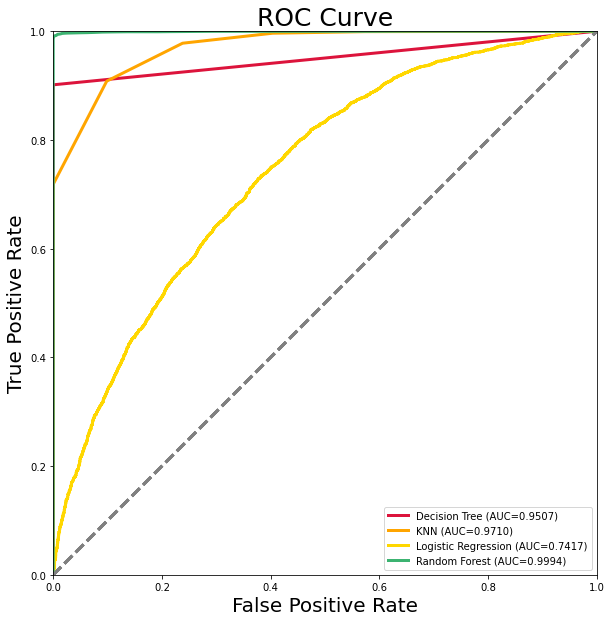

In [95]:
names = ['Decision Tree',
         'KNN',
         'Logistic Regression',
         'Random Forest']

sampling_methods = [tree,
                    knn,
                    lg,
                    rfc]

colors = ['crimson',
          'orange',
          'gold',
          'mediumseagreen',
          'steelblue', 
          'mediumpurple']

#ROC curves
train_roc_graph = multi_models_roc(names, sampling_methods, colors, x_train, y_train)


In [14]:
rfc = RandomForestClassifier()

# Adjust random_state with grid search
param_grid = {'random_state':np.arange(1,121,10)}
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(x_train,y_train)

best_param = gs.best_params_
best_score = gs.best_score_
print(best_param, best_score)

{'random_state': 61} 0.8757887443930231


In [16]:
rfc = RandomForestClassifier()

# Adjust random_state with grid search
param_grid = {'random_state':np.arange(50,70,1)}
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(x_train,y_train)

best_param = gs.best_params_
best_score = gs.best_score_
print(best_param, best_score)

{'random_state': 55} 0.8767105596406513


The highest acore：0.8769150586181562 n_estimators is：191


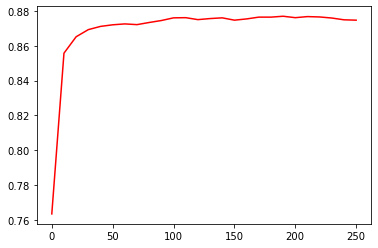

In [21]:
# Adject n_estimators（Most impact on random forests）
score_lt = []

# Create a random forest every 10 steps to obtain the scores of different n_estimators
for i in range(0,260,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=55)
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('The highest acore：{}'.format(score_max),
      'n_estimators is：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(0,260,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

The highest acore：0.8776315376355566 n_estimators is：193


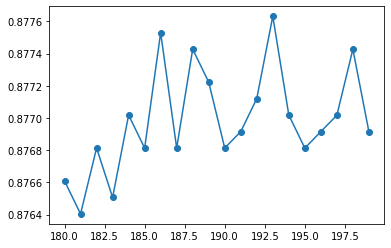

In [22]:
# Narrow n_estimators around 191 to 180-200
score_lt = []
for i in range(180,200):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=55)
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('The highest acore：{}'.format(score_max),
      'n_estimators is：{}'.format(score_lt.index(score_max)+180))

x = np.arange(180,200)
plt.subplot(111)
plt.plot(x, score_lt,'o-')
plt.show()

In [23]:
# Create a random forest with n_estimators of 193
rfc = RandomForestClassifier(n_estimators=193
                             ,random_state=55)

# Adjust max_depth with grid search
param_grid = {'max_depth':np.arange(1,51,1)}
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(x_train,y_train)

best_param = gs.best_params_
best_score = gs.best_score_
print(best_param, best_score)

{'max_depth': 29} 0.8781435176754515


In [24]:
# Adjust max_features with grid search
param_grid = {'max_features':np.arange(1,13,1)}

rfc = RandomForestClassifier(n_estimators=193
                            ,random_state=55
                            ,max_depth=29)
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(x_train,y_train)
best_param = gs.best_params_
best_score = gs.best_score_
print(best_param, best_score) 

{'max_features': 1} 0.8868390151396224


In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=193
                            ,random_state=55
                            ,max_depth=29
                            ,max_features=1
                            ,class_weight='balanced')
rfc1.fit(x_train,y_train)
accuracy=cross_val_score(rfc1, x_train,y_train, cv=10)
y_pred = rfc1.predict(x_test)
print('Model Accuracy',accuracy.mean())
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Result',classification_report(y_test,y_pred))

Model Accuracy 0.8839730990700216
Confusion Matrix [[4886    0]
 [ 148 4738]]
Result               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4886
           1       1.00      0.97      0.98      4886

    accuracy                           0.98      9772
   macro avg       0.99      0.98      0.98      9772
weighted avg       0.99      0.98      0.98      9772



Ranking of feature importance
1 Blood_pH 0.18716971624742462
2 Blood_Urea_Nitrogen 0.1326156544799197
3 Blood_Creatinine 0.12460306881627503
4 Urine 0.11547566090168965
5 AGE 0.11174900136705947
6 Blood_Calcium 0.10697374896274713
7 Blood_Glucose 0.10639653780279329
8 MARITAL_STATUS 0.03369044442474926
9 hypertension 0.027594060321936054
10 ETHNICITY 0.020912133227824415
11 diabetes 0.020778735114201873


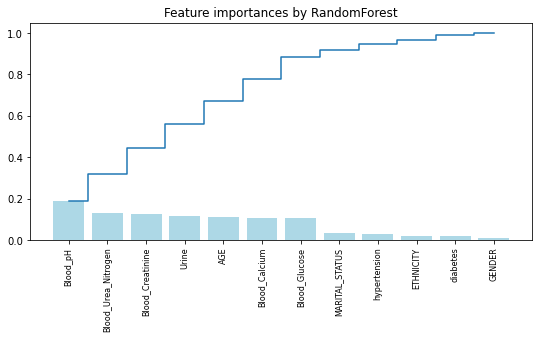

In [118]:
# Feature importance
feat_labels = x_train.columns[0:]
importances = rfc1.feature_importances_
indices = np.argsort(importances)[::-1]
print('Ranking of feature importance')
for f,j in zip(range(x_train.shape[1]-1),indices):
    print(f + 1, feat_labels[j], importances[j])
    
    
plt.figure(figsize=(9,4)) 
plt.title('Feature importances by RandomForest') 
plt.bar(range(len(indices)),importances[indices],color='lightblue', align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid')
plt.xticks(range(len(indices)),feature_name[indices],rotation='vertical',fontsize=8) 
plt.xlim([-1,len(indices)]) 
plt.show()



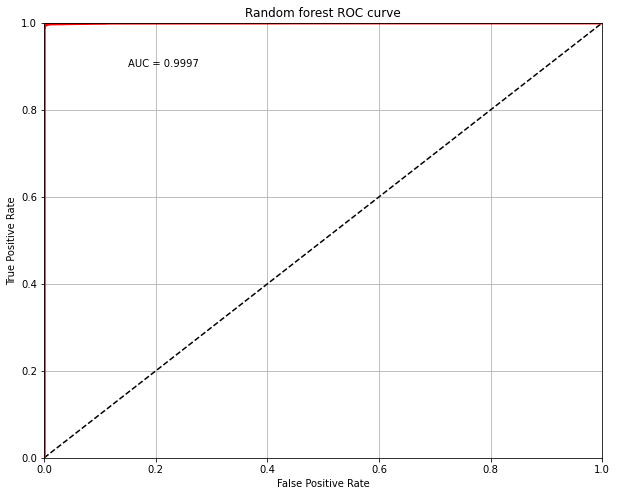

In [72]:
from sklearn.metrics import *
#ROC curve of the optimized random forest

pre_y = rfc1.predict_proba(x_test)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_test, pre_y)  
aucval = auc(fpr_Nb, tpr_Nb)
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Random forest ROC curve")
plt.text(0.15,0.9,'AUC = %4.4f'%aucval)
plt.show()

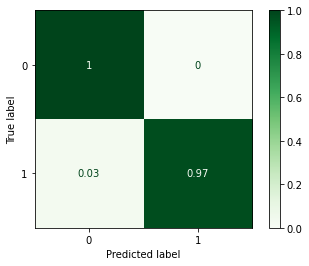

In [28]:
from sklearn.metrics import plot_confusion_matrix
# Confusion matrix of the optimized random forest
plot_confusion_matrix(rfc1, x_test, y_test, cmap=plt.cm.Greens, normalize='true')
plt.show()

In [64]:
def Renal_Failure_prediction(x):
    result = rfc1.predict(x)#using models to predict
    rate = rfc1.predict_proba(x)
    if result==0:
        print("The mortality rate for this patient within 90 days is: ", rate[0][1])
    else:
        print("The mortality rate for this patient within 90 days is: ", rate[0][0])

In [45]:
#Virtual data generated as a result of the group members' projects
#Test models using virtual data
test_data1 = pd.read_csv('synthetic_data_1.csv') 

In [46]:
test_data1_1=test_data1.drop(['Unnamed: 0','PATIENT_ID'],axis=1)

In [47]:
test_data1_1.isnull().sum()

AGE                    0
GENDER                 0
MARITAL_STATUS         0
ETHNICITY              0
Blood_Calcium          0
Blood_Creatinine       0
Blood_Glucose          0
Blood_pH               0
Blood_Urea_Nitrogen    0
Urine                  0
diabetes               0
hypertension           0
Death_Flag             0
dtype: int64

In [48]:
x_test_1=test_data1_1.drop('Death_Flag',axis=1)
y_test_1=test_data1_1['Death_Flag']

In [49]:
x_test_1

,AGE,GENDER,MARITAL_STATUS,ETHNICITY,Blood_Calcium,Blood_Creatinine,Blood_Glucose,Blood_pH,Blood_Urea_Nitrogen,Urine,diabetes,hypertension
0,82,1,3,4,0.867106,0.911495,0.899217,0.334986,0.944900,0.024414,0,0
1,69,2,3,4,0.906073,0.062303,0.585286,0.000000,0.000000,0.000000,0,1
2,85,1,6,4,0.013677,0.880078,0.872542,0.294220,0.937309,0.000678,0,0
3,74,1,3,4,0.000000,0.028858,0.922599,0.293327,0.190274,0.058522,0,1
4,75,1,3,4,0.906350,0.204828,0.861169,0.000000,0.817414,0.052925,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,82,1,3,4,0.000000,0.256510,0.929038,0.293739,0.820437,0.036010,0,1
5920,74,1,3,4,0.918360,0.869857,0.850695,0.290153,0.944572,0.039165,0,1
5921,84,1,3,4,0.877738,0.000000,0.841569,0.096680,0.172133,0.058288,0,1
5922,48,1,5,4,0.901109,0.206080,0.849000,0.294469,0.501052,0.055580,0,0


In [59]:
ss = StandardScaler()
ss.fit(x_test_1[['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine']])
result_1 = ss.transform(x_test_1[['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine']])
result_data = pd.DataFrame(result_1,columns=['AGE','Blood_Calcium','Blood_Creatinine','Blood_Glucose','Blood_pH','Blood_Urea_Nitrogen','Urine'])
x_test_1['AGE'] = result_data['AGE']
x_test_1['Blood_Calcium'] = result_data['Blood_Calcium']
x_test_1['Blood_Creatinine'] = result_data['Blood_Creatinine']
x_test_1['Blood_Glucose'] = result_data['Blood_Glucose']
x_test_1['Blood_pH'] = result_data['Blood_pH']
x_test_1['Blood_Urea_Nitrogen'] = result_data['Blood_Urea_Nitrogen']
x_test_1['Urine'] = result_data['Urine']
x_test_1

,AGE,GENDER,MARITAL_STATUS,ETHNICITY,Blood_Calcium,Blood_Creatinine,Blood_Glucose,Blood_pH,Blood_Urea_Nitrogen,Urine,diabetes,hypertension
0,0.825946,1,3,4,0.817681,1.095501,0.428303,0.074168,0.827874,-0.430886,0,0
1,0.080863,2,3,4,0.912831,-1.092649,-1.224471,-1.341437,-2.149158,-1.425318,0,1
2,0.997888,1,6,4,-1.266208,1.014548,0.287867,-0.098105,0.803957,-1.397697,0,0
3,0.367433,1,3,4,-1.299605,-1.178827,0.551406,-0.101879,-1.549674,0.958422,0,1
4,0.424747,1,3,4,0.913509,-0.725397,0.227988,-1.341437,0.426213,0.730458,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,0.825946,1,3,4,-1.299605,-0.592226,0.585303,-0.100136,0.435736,0.041467,0,1
5920,0.367433,1,3,4,0.942833,0.988211,0.172846,-0.115291,0.826841,0.169989,0,1
5921,0.940574,1,3,4,0.843643,-1.253187,0.124802,-0.932880,-1.606830,0.948891,0,1
5922,-1.122733,1,5,4,0.900711,-0.722171,0.163922,-0.097053,-0.570527,0.838584,0,0


In [70]:
x = [x_test_1.loc[1005]]
x #Return to patient information

[AGE                    1.227145
 GENDER                 2.000000
 MARITAL_STATUS         6.000000
 ETHNICITY              4.000000
 Blood_Calcium         -1.294529
 Blood_Creatinine      -1.217056
 Blood_Glucose         -0.007890
 Blood_pH              -0.099007
 Blood_Urea_Nitrogen   -1.338249
 Urine                  0.263469
 diabetes               0.000000
 hypertension           1.000000
 Name: 1005, dtype: float64]

In [71]:
Renal_Failure_prediction(x)#Calling the model for prediction

The mortality rate for this patient within 90 days is:  0.29015544041450775
